#**Name: Nader Mohamed Elhadedy**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# helping libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
loans = pd.read_csv('train_set.csv')

In [ ]:
loans.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
loans.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [ ]:
loans.shape

(252000, 13)

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


In [ ]:
loans.shape

(252000, 13)

In [ ]:
loans.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
loans.duplicated().sum()

0

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split.split(loans, loans['Risk_Flag']):
  strat_train_set = loans.loc[train_index]
  strat_valid_set = loans.loc[valid_index]

In [ ]:
strat_train_set

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
13714,13715,8132252,72,7,single,rented,no,Mechanical_engineer,Karaikudi,Tamil_Nadu,6,13,0
51718,51719,7915651,64,8,single,rented,no,Psychologist,Jamnagar,Gujarat,3,12,0
99982,99983,6272029,49,12,single,rented,no,Drafter,Sagar,Madhya_Pradesh,7,10,0
107150,107151,1832125,54,13,single,rented,yes,Scientist,Vijayanagaram,Andhra_Pradesh,12,14,0
94564,94565,7954133,31,7,single,rented,yes,Drafter,Avadi,Tamil_Nadu,4,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197799,197800,5144485,55,4,single,rented,no,Secretary,Chapra,Bihar,4,13,0
228682,228683,9031799,49,5,single,rented,no,Architect,Bhimavaram,Andhra_Pradesh,4,10,0
114068,114069,1585215,64,9,single,rented,no,Politician,Karnal,Haryana,9,10,0
200681,200682,4784462,60,19,married,rented,yes,Economist,Durg,Chhattisgarh,9,14,0


In [ ]:
strat_valid_set

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
73540,73541,1695876,58,6,single,rented,yes,Computer_hardware_engineer,Bhalswa_Jahangir_Pur,Delhi,6,13,0
106484,106485,3423010,74,3,single,rented,yes,Computer_hardware_engineer,Dehradun,Uttarakhand,3,10,0
164137,164138,9685641,63,5,single,rented,no,Psychologist,Tadipatri,Andhra_Pradesh,5,12,0
36524,36525,4806341,79,3,single,rented,no,Computer_operator,Panchkula,Haryana,3,13,0
233388,233389,195009,79,15,single,rented,yes,Librarian,Morbi,Gujarat,4,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174885,174886,8129321,22,16,single,rented,no,Physician,Thiruvananthapuram,Kerala,13,12,0
203158,203159,1839079,43,11,married,rented,no,Aviator,Bhubaneswar,Odisha,10,11,0
234667,234668,2606288,51,6,single,rented,no,Architect,Malegaon,Maharashtra,6,13,0
30812,30813,78418,35,18,single,rented,no,Air_traffic_controller,Bathinda,Punjab,12,12,0


In [ ]:
Counter(strat_train_set.Risk_Flag)

Counter({0: 176803, 1: 24797})

In [ ]:
Counter(strat_valid_set.Risk_Flag)

Counter({0: 44201, 1: 6199})

In [ ]:
strat_train_set.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [ ]:
strat_train_set.drop(['Id', 'Profession', 'CITY', 'STATE'], axis=1, inplace=True)

In [ ]:
for col in strat_train_set.select_dtypes('object').columns:
  print(strat_train_set[col].value_counts())
  print()

single     181079
married     20521
Name: Married/Single, dtype: int64

rented          185484
owned            10372
norent_noown      5744
Name: House_Ownership, dtype: int64

no     141131
yes     60469
Name: Car_Ownership, dtype: int64



In [ ]:
X = strat_train_set[strat_train_set.columns.difference(['Risk_Flag'])]
y = strat_train_set.Risk_Flag

In [ ]:
# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X, y)

# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)

print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Combined Random Sampling: Counter({0: 110501, 1: 88401})


In [ ]:
strat_train_set = pd.DataFrame(np.c_[X_combined_sampling, y_combined_sampling], columns=list(X.columns) + ['Risk_Flag'])

In [ ]:
strat_train_set.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Car_Ownership,Experience,House_Ownership,Income,Married/Single,Risk_Flag
0,79,12,0,yes,0,rented,147127,single,0
1,38,14,5,yes,5,rented,850446,single,0
2,61,12,11,yes,11,rented,2615443,single,0
3,79,13,3,no,17,rented,8344425,single,0
4,35,13,10,no,10,rented,9456793,single,0


In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198902 entries, 0 to 198901
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Age                198902 non-null  object
 1   CURRENT_HOUSE_YRS  198902 non-null  object
 2   CURRENT_JOB_YRS    198902 non-null  object
 3   Car_Ownership      198902 non-null  object
 4   Experience         198902 non-null  object
 5   House_Ownership    198902 non-null  object
 6   Income             198902 non-null  object
 7   Married/Single     198902 non-null  object
 8   Risk_Flag          198902 non-null  object
dtypes: object(9)
memory usage: 13.7+ MB


In [ ]:
strat_train_set = strat_train_set.convert_dtypes()

In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198902 entries, 0 to 198901
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Age                198902 non-null  Int64 
 1   CURRENT_HOUSE_YRS  198902 non-null  Int64 
 2   CURRENT_JOB_YRS    198902 non-null  Int64 
 3   Car_Ownership      198902 non-null  string
 4   Experience         198902 non-null  Int64 
 5   House_Ownership    198902 non-null  string
 6   Income             198902 non-null  Int64 
 7   Married/Single     198902 non-null  string
 8   Risk_Flag          198902 non-null  Int64 
dtypes: Int64(6), string(3)
memory usage: 14.8 MB


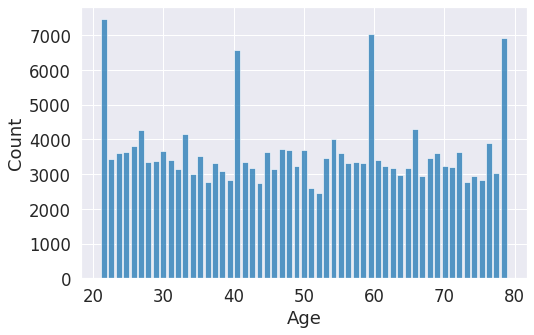

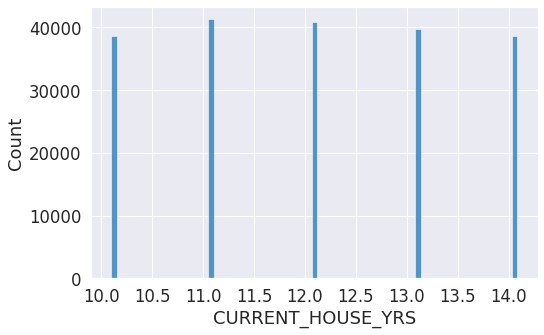

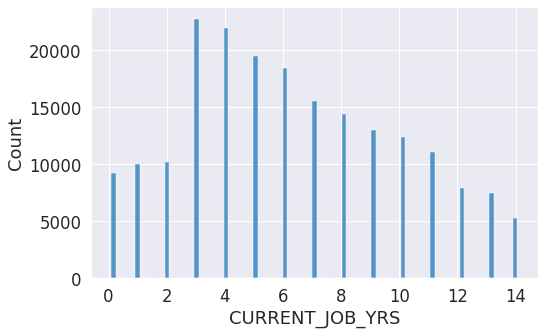

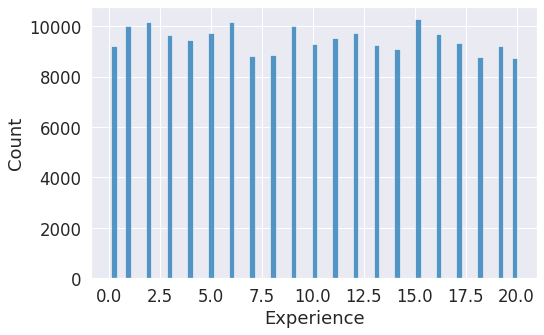

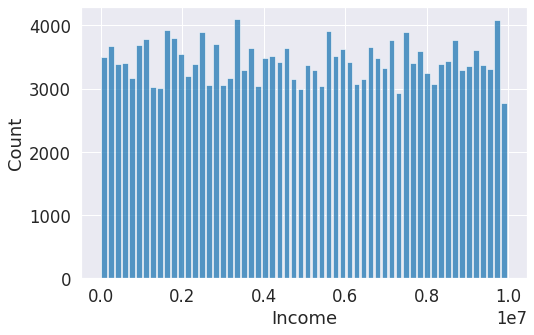

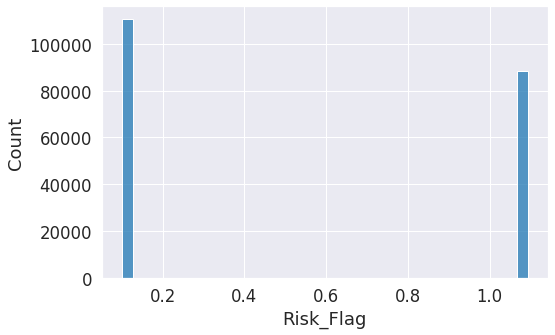

In [ ]:
for i, col in enumerate(strat_train_set.select_dtypes(exclude='string').columns):
  sns.set_style("darkgrid")
  sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
  plt.figure(i, figsize=(8,5))
  _ = sns.histplot(data=strat_train_set[col], shrink=.8)

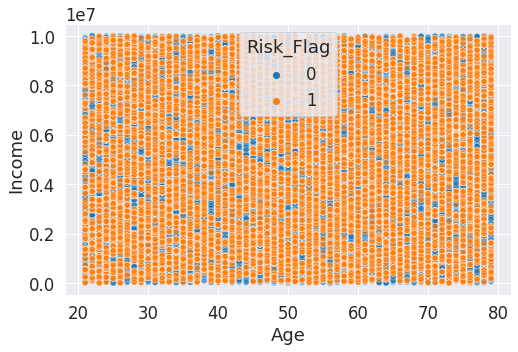

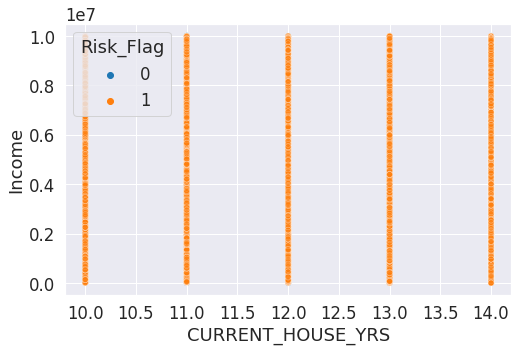

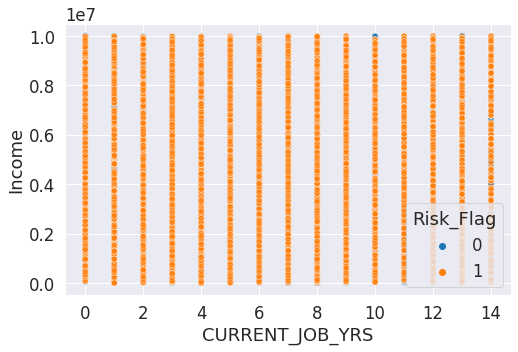

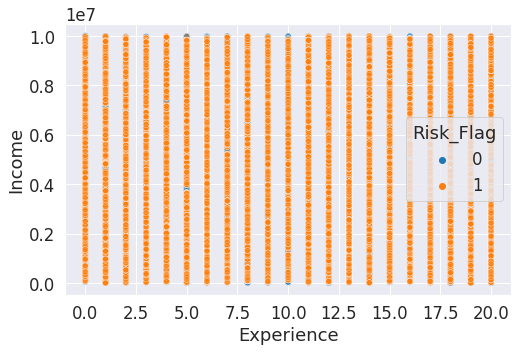

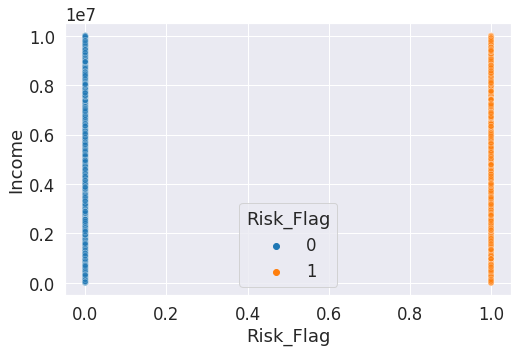

In [ ]:
for i, col in enumerate(strat_train_set.select_dtypes(exclude='string').columns.difference(['Income'])):
  sns.set_style("darkgrid")
  sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
  plt.figure(i, figsize=(8,5))
  _ = sns.scatterplot(data=strat_train_set, x=col, y='Income', hue='Risk_Flag', alpha=0.4)

In [ ]:
strat_train_set.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Car_Ownership,Experience,House_Ownership,Income,Married/Single,Risk_Flag
0,79,12,0,yes,0,rented,147127,single,0
1,38,14,5,yes,5,rented,850446,single,0
2,61,12,11,yes,11,rented,2615443,single,0
3,79,13,3,no,17,rented,8344425,single,0
4,35,13,10,no,10,rented,9456793,single,0


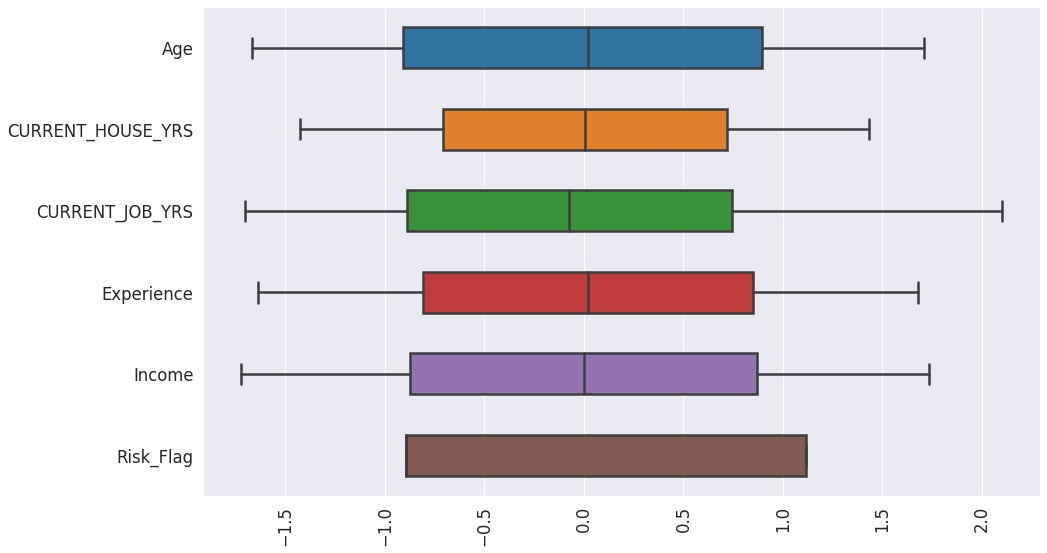

In [ ]:
# scaling dataset now just for better visualization
temp_scaler = StandardScaler()
scaled_df = pd.DataFrame(temp_scaler.fit_transform(strat_train_set.copy().select_dtypes(exclude='string')), columns=strat_train_set.select_dtypes(exclude='string').columns)


plt.figure(figsize=(15,9))
_ = sns.boxplot(data=scaled_df, width=0.5, orient='h')
plt.xticks(rotation=90)
plt.show()

In [ ]:
np.sum(strat_train_set['CURRENT_JOB_YRS'] > strat_train_set['Experience'])

0

In [ ]:
np.sum(strat_train_set['CURRENT_JOB_YRS'] > strat_train_set['Age'])

0

In [ ]:
np.sum(strat_train_set['CURRENT_HOUSE_YRS'] > strat_train_set['Age'])

0

In [ ]:
np.sum(strat_train_set['Experience'] > strat_train_set['Age'])

0

In [ ]:
np.sum((strat_train_set['Age'] - strat_train_set['Experience']) < 14)

15706

In [ ]:
len(strat_train_set)

198902

In [ ]:
198902 - 15501

183401

In [ ]:
strat_train_set.drop(strat_train_set[(strat_train_set['Age'] - strat_train_set['Experience']) < 14].index, inplace=True)

len(strat_train_set)

183196

In [ ]:
strat_train_set["Income_cats"] = pd.cut(strat_train_set["Income"],
bins=np.array([0., .25, .5, .75, 1.])*1e7,
labels=['income_low', 'income_avg', 'income_high', 'income_very_high']).astype('string')

In [ ]:
def age(row):
    if row['Age'] >= 19 and row['Age'] < 30:
        val = 'age_cat_one'
    elif row['Age'] >= 30 and row['Age'] < 45:
        val = 'age_cat_two'
    elif row['Age'] >= 45 and row['Age'] < 65:
        val = 'age_cat_three'
    else:
        val = 'age_cat_four'
    
    return val

########################################################

def exp(row):
    if row['Experience'] <= 5:
        val = 'exp_cat_one'
    elif row['Experience'] >= 6 and row['Experience'] <= 10:
        val = 'exp_cat_two'
    elif row['Experience'] >= 11 and row['Experience'] <= 15:
        val = 'exp_cat_three'
    else:
        val = 'exp_cat_four'
    
    return val

In [ ]:
strat_train_set['Age_cats'] = strat_train_set.apply(age, axis=1)
strat_train_set['Exp_cats'] = strat_train_set.apply(exp, axis=1)

In [ ]:
strat_train_set.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Car_Ownership,Experience,House_Ownership,Income,Married/Single,Risk_Flag,Income_cats,Age_cats,Exp_cats
0,79,12,0,yes,0,rented,147127,single,0,income_low,age_cat_four,exp_cat_one
1,38,14,5,yes,5,rented,850446,single,0,income_low,age_cat_two,exp_cat_one
2,61,12,11,yes,11,rented,2615443,single,0,income_avg,age_cat_three,exp_cat_three
3,79,13,3,no,17,rented,8344425,single,0,income_very_high,age_cat_four,exp_cat_four
4,35,13,10,no,10,rented,9456793,single,0,income_very_high,age_cat_two,exp_cat_two


In [ ]:
strat_train_set.Income_cats.value_counts()

income_low          46668
income_very_high    45774
income_high         45655
income_avg          45099
Name: Income_cats, dtype: Int64

In [ ]:
strat_train_set = strat_train_set.convert_dtypes()

In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183196 entries, 0 to 198901
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Age                183196 non-null  Int64 
 1   CURRENT_HOUSE_YRS  183196 non-null  Int64 
 2   CURRENT_JOB_YRS    183196 non-null  Int64 
 3   Car_Ownership      183196 non-null  string
 4   Experience         183196 non-null  Int64 
 5   House_Ownership    183196 non-null  string
 6   Income             183196 non-null  Int64 
 7   Married/Single     183196 non-null  string
 8   Risk_Flag          183196 non-null  Int64 
 9   Income_cats        183196 non-null  string
 10  Age_cats           183196 non-null  string
 11  Exp_cats           183196 non-null  string
dtypes: Int64(6), string(6)
memory usage: 19.2 MB


In [ ]:
strat_train_set_cats = strat_train_set.select_dtypes('string')

In [ ]:
cat_encoder = OneHotEncoder()
strat_train_set_cats_1hot = cat_encoder.fit_transform(strat_train_set_cats)

In [ ]:
cat_encoder.get_feature_names()

array(['x0_no', 'x0_yes', 'x1_norent_noown', 'x1_owned', 'x1_rented',
       'x2_married', 'x2_single', 'x3_income_avg', 'x3_income_high',
       'x3_income_low', 'x3_income_very_high', 'x4_age_cat_four',
       'x4_age_cat_one', 'x4_age_cat_three', 'x4_age_cat_two',
       'x5_exp_cat_four', 'x5_exp_cat_one', 'x5_exp_cat_three',
       'x5_exp_cat_two'], dtype=object)

In [ ]:
strat_train_set_cats_1hot = pd.DataFrame(strat_train_set_cats_1hot.toarray(), columns=cat_encoder.get_feature_names()).convert_dtypes()

In [ ]:
strat_train_set_cats_1hot.head()

,x0_no,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_married,x2_single,x3_income_avg,x3_income_high,x3_income_low,x3_income_very_high,x4_age_cat_four,x4_age_cat_one,x4_age_cat_three,x4_age_cat_two,x5_exp_cat_four,x5_exp_cat_one,x5_exp_cat_three,x5_exp_cat_two
0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
strat_train_set_cats_1hot.drop(['x0_no', 'x2_married'], inplace=True, axis=1)

In [ ]:
strat_train_set_cats_1hot.head()

,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_single,x3_income_avg,x3_income_high,x3_income_low,x3_income_very_high,x4_age_cat_four,x4_age_cat_one,x4_age_cat_three,x4_age_cat_two,x5_exp_cat_four,x5_exp_cat_one,x5_exp_cat_three,x5_exp_cat_two
0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0
1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0
2,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0
4,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
strat_train_set.drop(strat_train_set_cats.columns, axis=1, inplace=True)

In [ ]:
strat_train_set = pd.DataFrame(np.c_[strat_train_set, strat_train_set_cats_1hot], columns=list(strat_train_set.columns) + list(strat_train_set_cats_1hot.columns))

In [ ]:
strat_train_set.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Experience,Income,Risk_Flag,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_single,x3_income_avg,x3_income_high,x3_income_low,x3_income_very_high,x4_age_cat_four,x4_age_cat_one,x4_age_cat_three,x4_age_cat_two,x5_exp_cat_four,x5_exp_cat_one,x5_exp_cat_three,x5_exp_cat_two
0,79,12,0,0,147127,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0
1,38,14,5,5,850446,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0
2,61,12,11,11,2615443,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0
3,79,13,3,17,8344425,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0
4,35,13,10,10,9456793,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
strat_train_set = strat_train_set.convert_dtypes()

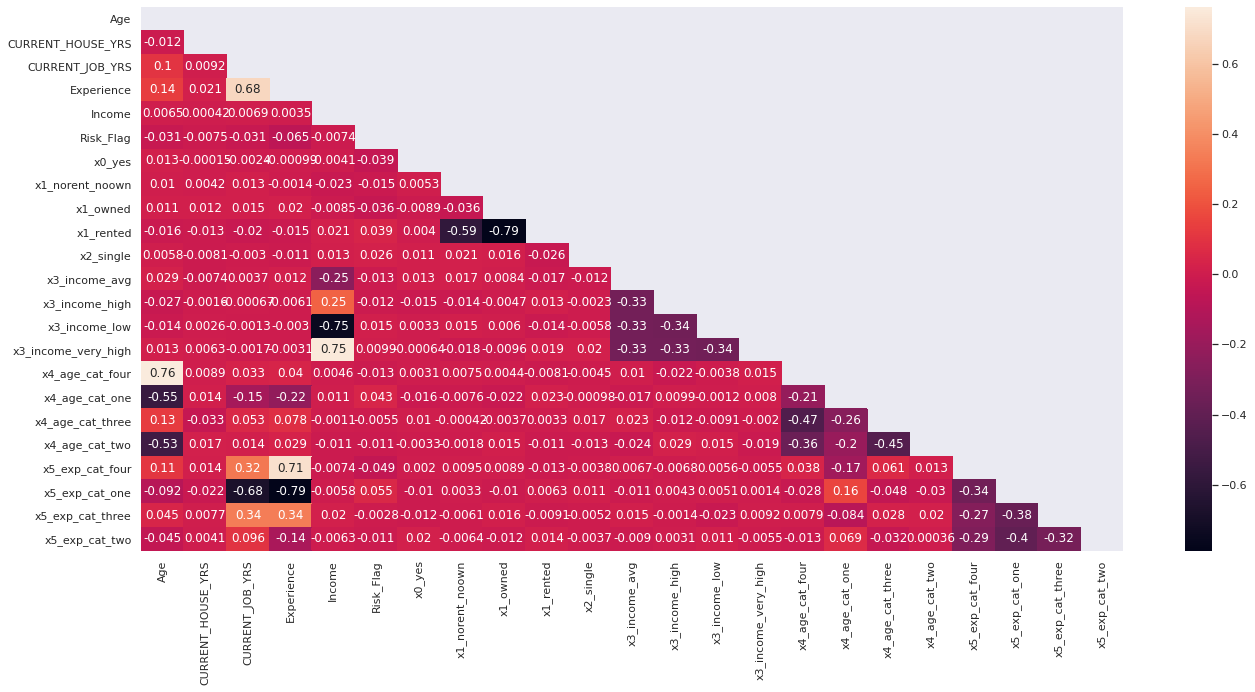

In [ ]:
corr = strat_train_set.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.set()
plt.figure(figsize=(22,10))
sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

In [ ]:
strat_train_set.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Experience,Income,Risk_Flag,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_single,x3_income_avg,x3_income_high,x3_income_low,x3_income_very_high,x4_age_cat_four,x4_age_cat_one,x4_age_cat_three,x4_age_cat_two,x5_exp_cat_four,x5_exp_cat_one,x5_exp_cat_three,x5_exp_cat_two
0,79,12,0,0,147127,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0
1,38,14,5,5,850446,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0
2,61,12,11,11,2615443,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0
3,79,13,3,17,8344425,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0
4,35,13,10,10,9456793,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
strat_train_set['Income'] = strat_train_set['Income']/1e6

In [ ]:
train_set_prepared = strat_train_set.copy()

---

In [ ]:
def preprocessing_pipeline(data_set):
  
  data_set.drop(['Id', 'Profession', 'CITY', 'STATE'], axis=1, inplace=True)
  data_set = data_set.convert_dtypes()

  c1 = data_set[data_set['CURRENT_JOB_YRS'] > data_set['Experience']].index
  c2 = data_set[data_set['CURRENT_JOB_YRS'] > data_set['Age']].index
  c3 = data_set[data_set['CURRENT_HOUSE_YRS'] > data_set['Age']].index
  c4 = data_set[data_set['Experience'] > data_set['Age']].index
  c5 = data_set[(data_set['Age'] - data_set['Experience']) < 14].index

  data_set.drop(set(list(c1)+list(c2)+list(c3)+list(c4)+list(c5)), inplace=True)

  data_set["Income_cats"] = pd.cut(data_set["Income"],
    bins=np.array([0., .25, .5, .75, 1.])*1e7,
    labels=['income_low', 'income_avg', 'income_high', 'income_very_high']).astype('string')

  data_set['Age_cats'] = data_set.apply(age, axis=1)
  data_set['Exp_cats'] = data_set.apply(exp, axis=1)

  data_set = data_set.convert_dtypes()

  set_cats = data_set.select_dtypes('string')
  set_cats = set_cats[["Car_Ownership", "House_Ownership", "Married/Single", "Income_cats",	"Age_cats",	"Exp_cats"]]
  set_cats_1hot = cat_encoder.transform(set_cats)

  set_cats_1hot = pd.DataFrame(set_cats_1hot.toarray(), columns=cat_encoder.get_feature_names()).convert_dtypes()

  set_cats_1hot.drop(['x0_no', 'x2_married'], inplace=True, axis=1)

  data_set.drop(set_cats.columns, axis=1, inplace=True)

  data_set = pd.DataFrame(np.c_[data_set, set_cats_1hot], columns=list(data_set.columns) + list(set_cats_1hot.columns))

  data_set = data_set.convert_dtypes()

  data_set['Income'] = data_set['Income']/1e6

  # if('Risk_Flag' in data_set.columns):
  #   data_set.drop(['Risk_Flag'], axis=1, inplace=True)

  return data_set

In [ ]:
strat_valid_set.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
strat_valid_set.duplicated().sum()

0

In [ ]:
valid_set_prepared = preprocessing_pipeline(strat_valid_set)

In [ ]:
valid_set_prepared.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_single,x3_income_avg,x3_income_high,x3_income_low,x3_income_very_high,x4_age_cat_four,x4_age_cat_one,x4_age_cat_three,x4_age_cat_two,x5_exp_cat_four,x5_exp_cat_one,x5_exp_cat_three,x5_exp_cat_two
0,1.695876,58,6,6,13,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1
1,3.423010,74,3,3,10,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0
2,9.685641,63,5,5,12,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0
3,4.806341,79,3,3,13,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0
4,0.195009,79,15,4,14,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0


In [ ]:
train_set_prepared.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Experience,Income,Risk_Flag,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_single,x3_income_avg,x3_income_high,x3_income_low,x3_income_very_high,x4_age_cat_four,x4_age_cat_one,x4_age_cat_three,x4_age_cat_two,x5_exp_cat_four,x5_exp_cat_one,x5_exp_cat_three,x5_exp_cat_two
0,79,12,0,0,0.147127,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0
1,38,14,5,5,0.850446,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0
2,61,12,11,11,2.615443,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0
3,79,13,3,17,8.344425,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0
4,35,13,10,10,9.456793,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1


---

# **Task1: Classification**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix

> ## **Choosing best features for classification**

In [ ]:
X_train = train_set_prepared[train_set_prepared.columns.difference(['Risk_Flag'])]
y_train = train_set_prepared['Risk_Flag'].astype('int')

X_valid = valid_set_prepared[valid_set_prepared.columns.difference(['Risk_Flag'])]
y_valid = valid_set_prepared['Risk_Flag'].astype('int')

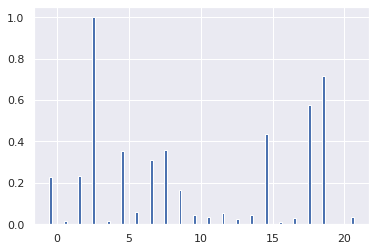

In [ ]:
selector = SelectKBest(f_classif, k=14)
x_temp = selector.fit_transform(X_train, y_train)

cols = X_train.columns[selector.get_support()]
X_train_trans = pd.DataFrame(x_temp, columns=cols) # final output to use

scores = -np.log10(selector.pvalues_)
X_indices = np.arange(X_train.shape[-1])
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2)
plt.show()

# **1) K Nearest Neighbors**

> ### **Strat training the model**

In [ ]:
parameters = {'n_neighbors': [5, 15], 'weights': ['uniform', 'distance']}
knn_model = GridSearchCV(KNeighborsClassifier(), parameters, scoring='accuracy')

In [ ]:
knn_model.fit(X_train_trans, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 15],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
knn_model.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

In [ ]:
knn_model.score(X_train_trans, y_train)

0.8952324286556474

In [ ]:
knn_model.score(X_valid[cols], y_valid)

0.8311172212317144

In [ ]:
roc_auc_score(y_valid, knn_model.predict(X_valid[cols]))

0.8229762988430771

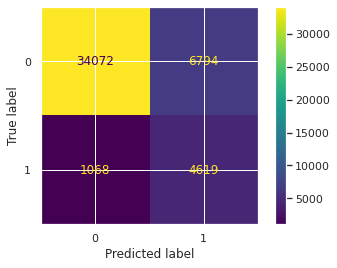

In [ ]:
_ = plot_confusion_matrix(knn_model, X_valid[cols], y_valid, values_format='.0f')

> #### **I achieved low variance with other parameters' values but these values gave best recall score. (lowest FN)**

> ## **Testing model on test_data**

In [ ]:
test_set = pd.read_csv('test_set.csv')

In [ ]:
test_set.rename(columns={'ID':'Id'}, inplace=True)

In [ ]:
test_set.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [ ]:
test_set.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64

In [ ]:
test_set.duplicated().sum()

0

In [ ]:
test_set_prepared = preprocessing_pipeline(test_set)

In [ ]:
knn_model.predict(test_set_prepared[cols])

array([0, 0, 0, ..., 0, 0, 1])

> #### The prediction to be submitted

---

> ## **Implementation of the algorithm**

In [ ]:
from scipy.stats import mode

class KnnClassifier:

  def __init__(self, k=5, weights='distance', metric='minkowski'):
    self.k = k
    self.weights = weights
    self.metric = metric
    self.y_pred = []

  def fit_predict(self, train_x, train_y, test_x):
    pred = []
    for i in range(len(test_x)):
      dl, yl = [], []

      dl = list(np.sqrt(np.sum((train_x - test_x.iloc[i])**2, axis=1)).round(0))
      yl = list(train_y)

      new_yl = [j for i, j in sorted(zip(dl,yl))]

      pred.append(mode(new_yl[:self.k])[0][0])
    
    self.y_pred = pred


  def accuracy(self, y_test, y_pred):
    return np.mean(y_test == y_pred)


  def score_f1(self, y_test, y_pred):
    return f1_score(y_test, y_pred)


In [ ]:
knn_implemented = KnnClassifier(k=15)

knn_implemented.fit_predict(X_train_trans[:5000], y_train[:5000], X_valid[:300])

knn_implemented.accuracy(y_valid[:300], knn_implemented.y_pred)

0.87

> #### This implementation takes too much time to run so I took a small sample only of train_set and valid_set.

---

# **2) Logistic Regression**

> ### **Strat training the model**

In [ ]:
parameters = {'C': [1, 10], 'solver': ['lbfgs', 'liblinear'], 'max_iter': [500, 1000, 5000], 'tol': [0.1, 0.0001, 0.000001]}
logreg_model = GridSearchCV(LogisticRegression(random_state=0), parameters, scoring='accuracy')

In [ ]:
logreg_model.fit(X_train_trans, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'max_iter': [500, 1000, 5000],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.1, 0.0001, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
logreg_model.best_params_

{'C': 10, 'max_iter': 500, 'solver': 'liblinear', 'tol': 0.0001}

In [ ]:
logreg_model.score(X_train_trans, y_train)

0.5610384506211926

In [ ]:
logreg_model.score(X_valid[cols], y_valid)

0.8114192425837218

In [ ]:
roc_auc_score(y_valid, logreg_model.predict(X_valid[cols]))

0.5133319023826954

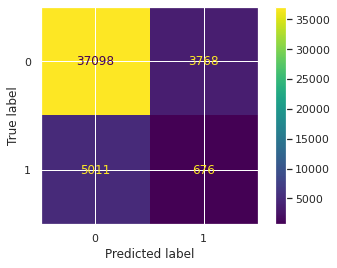

In [ ]:
_ = plot_confusion_matrix(logreg_model, X_valid[cols], y_valid, values_format='.0f')

> #### **Logistic regression is performing very bad**

---

> ## **Testing model on test_data**

In [ ]:
logreg_model.predict(test_set_prepared[cols])

array([0, 1, 0, ..., 1, 0, 0])

> #### The prediction to be submitted

---

> ## **Implementation of the algorithm**

In [ ]:
def ssr_gradient(x, y, b):
  z = x.dot(b)
  sigmoid = 1/(1 + np.exp(-z))
  res = sigmoid - y
  return (np.array(res).T*np.array(x.T)).mean(axis=1).reshape(-1,1)


def gradient_descent(gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06, c=1):
  #cost_history = [0] * n_iter
  vector = start
  for itr in range(n_iter):
    diff = -learn_rate * gradient(x, y, vector) + (c/len(y)) * vector
    if np.all(np.abs(diff) <= tolerance):
      break
    vector += diff
    z = x.dot(vector)
    #cost = np.sum(np.multiply(y, np.log(1/(1 + np.exp(-z)))) + np.multiply(1-y, np.log(1 - 1/(1 + np.exp(-z)))))/(-1 * len(y)) + c * np.sum(np.square(vector[1:]))
    #cost_history[itr] = cost
  return vector #, cost_history


def Accuracy(y_actual, y_pred):
    pred_classes = (y_pred >= 0.5).astype(int).flatten()
    return np.mean(pred_classes == y_actual.flatten())

In [ ]:
x = np.matrix(X_train_trans).astype('float')
x = np.c_[np.ones(len(x)), x]
y = np.matrix(y_train).T
b = np.matrix(np.zeros(x.shape[1])).T


trial = gradient_descent(ssr_gradient, x, y, b)

In [ ]:
b = trial
x = np.matrix(X_valid[cols]).astype('float')
x = np.c_[np.ones(len(x)), x]
y = np.array(y_valid)

z = x.dot(b)
sigmoid = 1/(1 + np.exp(-z))

y_act = y
y_pred = sigmoid

Accuracy(y_act, y_pred)

0.8778381629540524

---

# **3) Decision Tree**

> ### **Strat training the model**

In [ ]:
parameters = {'criterion': ["gini", "entropy"], 'splitter': ["best", "random"], 'max_depth': [4, 6, 10]}
dctree_model = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters, scoring='accuracy')

In [ ]:
dctree_model.fit(X_train_trans, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 10],
               

In [ ]:
dctree_model.best_params_

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

In [ ]:
dctree_model.score(X_train_trans, y_train)

0.632377344483504

In [ ]:
dctree_model.score(X_valid[cols], y_valid)

0.7580177432174081

In [ ]:
roc_auc_score(y_valid, dctree_model.predict(X_valid[cols]))

0.5924311906413763

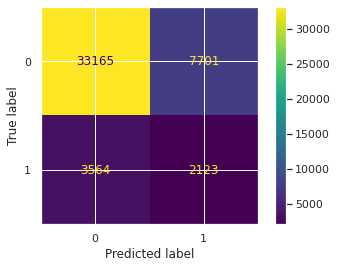

In [ ]:
_ = plot_confusion_matrix(dctree_model, X_valid[cols], y_valid, values_format='.0f')

> #### **Decision Tree performed slightly better than logistic regression but still not the best**

---

> ## **Testing model on test_data**

In [ ]:
dctree_model.predict(test_set_prepared[cols])

array([0, 1, 0, ..., 0, 0, 0])

> #### The prediction to be submitted

---

# **4) Support Vector Classifier**

> ### **Strat training the model**

In [ ]:
parameters = {'C': [10], 'max_iter': [800]}
svc_model = GridSearchCV(LinearSVC(random_state=0), parameters, scoring='accuracy')

In [ ]:
svc_model.fit(X_train_trans.iloc[:,:2], y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=0, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10], 'max_iter': [800]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

In [ ]:
svc_model.best_params_

{'C': 10, 'max_iter': 800}

In [ ]:
svc_model.score(X_train_trans.iloc[:,:2], y_train)

0.5581344570842158

In [ ]:
svc_model.score(X_valid[cols].iloc[:,:2], y_valid)

0.8778381629540524

In [ ]:
roc_auc_score(y_valid, svc_model.predict(X_valid[cols].iloc[:,:2]))

0.5

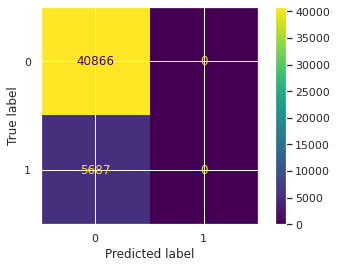

In [ ]:
_ = plot_confusion_matrix(svc_model, X_valid[cols].iloc[:,:2], y_valid, values_format='.0f')

> #### **SVC model requires data to be linearly separable, so it performed very bad and gave horrible results and it takes very long time running so I used the first two features only to make it run so bad results are not surprise.**

---

> ## **Testing model on test_data**

In [ ]:
svc_model.predict(test_set_prepared[cols].iloc[:,:2])

array([0, 0, 0, ..., 0, 0, 0])

> #### The prediction to be submitted

---

> ## **K-nearest neighbors and Decision tree are the best models and Knn is the best.**